<a href="https://colab.research.google.com/github/SPZenik/Intro_Numpy/blob/SPZenik-patch-1/Data_Cleaning_and_Reshaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA CLEANING**
Learning to clean a dataset
Start by Exploring your data.
1. Load and View Data

In [ ]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\dob_job_application_filings_subset.csv")

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the info of df
print(df.info())


       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

C:\Users\adeolu.adekunle\AppData\Local\Temp\ipykernel_28104\1661365847.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\dob_job_application_filings_subset.csv")


2. Further exploration
#In this exercise, you're going to look at the 'Borough', 'State', and 'Site Fill' columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the 'State' column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case. """


In [ ]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df.State.value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

Borough
MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: count, dtype: int64
State
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
MA        6
GA        6
KS        6
VA        5
CO        4
WI        3
MN        3
SC        3
AZ        3
UT        2
NC        2
RI        2
IN        1
VT        1
NM        1
MI        1
WA        1
Name: count, dtype: int64
Site Fill
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: count, dtype: int64


3. Visualizing single variables with histograms

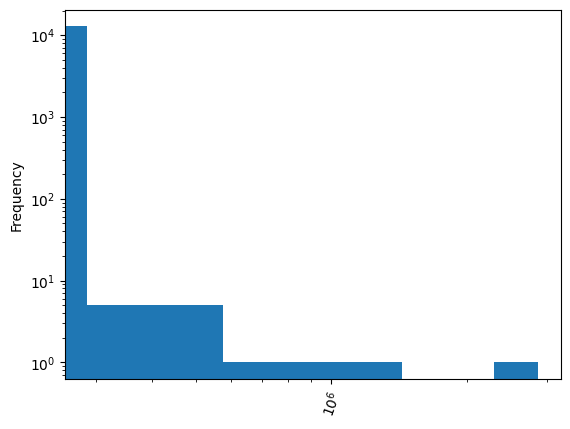

KeyError: 'Column not found: initial_cost'

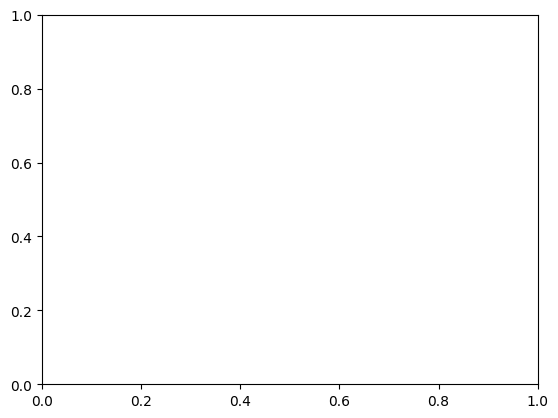

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
df['Existing Zoning Sqft'].describe()

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

**TIDYING DATA FOR ANALYSIS**

Reshaping data using Melt.py

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

# be sure to load airquality dataframe
df = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\airquality.csv")
airquality = df

# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())



   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


Customizing Melted Data

In [ ]:
# Melt airquality: airquality_melt
airquality_melt_v = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt_v.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


Pivoting Data

In [ ]:
 # Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt_v.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())


   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


Pivoting Duplicate Values

In [ ]:
# Pivot table the airquality_dup: airquality_pivot
airquality_pivot_dup = airquality_melt_v.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot_dup.head())


measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


C:\Users\adeolu.adekunle\AppData\Local\Temp\ipykernel_28104\278395416.py:2: FutureWarning: The provided callable <function mean at 0x000002694EB90540> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  airquality_pivot_dup = airquality_melt_v.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)


Reset the index of a dataframe

In [ ]:
# Reset the index of airquality_pivot
airquality_pivot_ind = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot_ind.head())

# Print the head of airquality
print(airquality.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


Splitting columns with (dot)str

In [ ]:
#import tb data
tb = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\tb.csv")

# Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())


  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


Splitting columns with (dot)split

In [ ]:
#Import dataset
ebola = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\ebola.csv")

# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())


         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


**Cleaning Data For Analysis**
1. Converting Data Types

In [ ]:
#Convert the sex column of the tips DataFrame to type 'category' using the .astype() method.

#Import dataset
tips = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\tips.csv")

# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.4+ KB
None


2. Working with Numeric Data

In [ ]:

# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'],errors='coerce')

# Print the info of tips
print(tips.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.4+ KB
None


3. String parsing with Regex

In [ ]:

 # Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile(r"\d{3}\-\d{3}\-\d{4}")

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))


True
False


4. Extracting numerical values from strings

In [ ]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall(r'\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


5. Pattern Matching

In [ ]:
# Write the first pattern
pattern1 = bool(re.match(pattern=r'\d{3}\-\d{3}\-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern=r'^\$\d*\.\d{2}$', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern=r'[A-Z]\w*', string='Australia'))
print(pattern3)


True
True
True


6. Data cleaning custom function

Using the Lambda Function

In [ ]:
#import datasets
tips = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\tips.csv")

# Print the head of tips
print(tips.head())


# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$',''))

# Print the head of tips
print(tips.head())

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall(r'\d+\.\d+', x))

# Print the head of tips
print(tips.head())

    total_bill    tip     sex smoker  day    time  size total_dollar
0         16.99  1.01  Female     No  Sun  Dinner     2       $16.99
1         10.34  1.66    Male     No  Sun  Dinner     3       $10.34
2         21.01  3.50    Male     No  Sun  Dinner     3       $21.01
3         23.68  3.31    Male     No  Sun  Dinner     2       $23.68
4         24.59  3.61  Female     No  Sun  Dinner     4       $24.59
    total_bill    tip     sex smoker  day    time  size total_dollar  \
0         16.99  1.01  Female     No  Sun  Dinner     2       $16.99   
1         10.34  1.66    Male     No  Sun  Dinner     3       $10.34   
2         21.01  3.50    Male     No  Sun  Dinner     3       $21.01   
3         23.68  3.31    Male     No  Sun  Dinner     2       $23.68   
4         24.59  3.61  Female     No  Sun  Dinner     4       $24.59   

  total_dollar_replace  
0                16.99  
1                10.34  
2                21.01  
3                23.68  
4                24.59  
   

In [ ]:

# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0

    # Return 1 if gender is 'Male'
    elif gender == 'Male':
        return 1

    # Return np.nan
    else:
        return np.nan

# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

# Print the first five rows of tips
print(tips.head())


   total_bill   tip     sex smoker  day    time  size recode
0       16.99  1.01  Female     No  Sun  Dinner     2      0
1       10.34  1.66    Male     No  Sun  Dinner     3      1
2       21.01  3.50    Male     No  Sun  Dinner     3      1
3       23.68  3.31    Male     No  Sun  Dinner     2      1
4       24.59  3.61  Female     No  Sun  Dinner     4      0


7. Filling Missing Data

In [ ]:

# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
None


8. Testing your data with Assert

In [ ]:
#Import dataset
ebola = pd.read_csv(r"C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\ebola.csv")

# Assert that there are no missing values (excluding the first column which are dates)
assert ebola.iloc[:, 1:].notnull().all().all()

# Assert that all values are >= 0 (excluding the first column)
assert (ebola.iloc[:, 1:] >= 0).all().all()

**Case Study**

Function that cleans your data by selecting rows, drops missing values etc.

In [ ]:
#import dataset
g1800s = pd.read_csv(r'C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\gapminder1.csv')

def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0 """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


Checking data types

In [ ]:
# Load the cleaned dataset
gapminder = pd.read_csv(r'C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\gapminder1.csv')

# Convert dataset to long format
gapminder_long = gapminder.melt(id_vars=["Life expectancy"], var_name="year", value_name="life_expectancy")

# Rename columns
gapminder_long.rename(columns={"Life expectancy": "country"}, inplace=True)

# Convert year to int and life_expectancy to float
gapminder_long["year"] = pd.to_numeric(gapminder_long["year"], errors="coerce").astype("Int64")
gapminder_long["life_expectancy"] = pd.to_numeric(gapminder_long["life_expectancy"], errors="coerce").astype("float64")

# Save the transformed dataset
gapminder_long.to_csv("gapminder_long.csv", index=False)

# Verify the transformation
print(gapminder_long.info())
print(gapminder_long.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56680 entries, 0 to 56679
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          56680 non-null  float64
 1   year             56420 non-null  Int64  
 2   life_expectancy  20100 non-null  float64
dtypes: Int64(1), float64(2)
memory usage: 1.4 MB
None
   country  year  life_expectancy
0      0.0  1800              NaN
1      1.0  1800            28.21
2      2.0  1800              NaN
3      3.0  1800            35.40
4      4.0  1800            28.82


Data Reshaping

In [ ]:
import pandas as pd

gapminder1 = pd.read_csv(r'C:\Users\adeolu.adekunle\OneDrive - Texas A&M AgriLife\Desktop\Git-tutorial\Decision-Science-for-Sustainable-Livestock-Systems_Module-2\Data Manipulation\datasets\gapminder.csv')

# Melt gapminder: gapminder_melt
gapminder1_melt = pd.melt (frame=gapminder1, id_vars='Life expectancy')

# Rename the columns
gapminder1_melt.columns = ['country','year','life_expectancy']

# Print the head of gapminder_melt
print(gapminder1_melt.head())

                 country        year  life_expectancy
0               Abkhazia  Unnamed: 0              0.0
1            Afghanistan  Unnamed: 0              1.0
2  Akrotiri and Dhekelia  Unnamed: 0              2.0
3                Albania  Unnamed: 0              3.0
4                Algeria  Unnamed: 0              4.0
